                                            ## WEEK 8 Weekday Work
 

For your assigned dataset.
1. List the output of your Neural Network analysis and describe the results in no less than 5 sentences. (2 points)
2. Tune your Neural Network such that your prediction results approach the quality of your Random Forest run. Include your code and explain in no less than 5 sentences how you adjusted the hidden layers, and what your adjustments have changed about how the algorithm works. (2 points)
3. Then look at your runs with Multiple and Logistic Regression. Write a Gradient Descent routine to see if you can improve on the quality of one of them. Include your code and your visualization(s) and explain in no less than 5 sentences how using Gradient Descent has improved your regression formula. If it hasn’t, explain why not. (2 points

In [30]:
# Preparation and setup

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns # for visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

#Reading in the IPL dataframe
Match = pd.read_csv('https://raw.githubusercontent.com/sohaibkhan27/Khan__IT533/master/data/Match.csv')

#Verifying that we can see the data
Match.head()

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country
0,335987,18-Apr-08,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,470,477,Bangalore,India
1,335988,19-Apr-08,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,bat,0,1,0,by runs,33.0,3.0,19.0,471,487,Chandigarh,India
2,335989,19-Apr-08,6,5,1,Feroz Shah Kotla,5,bat,0,1,0,by wickets,9.0,6.0,90.0,472,512,Delhi,India
3,335990,20-Apr-08,7,2,1,Wankhede Stadium,7,bat,0,1,0,by wickets,5.0,2.0,11.0,473,476,Mumbai,India
4,335991,20-Apr-08,1,8,1,Eden Gardens,8,bat,0,1,0,by wickets,5.0,1.0,4.0,474,486,Kolkata,India


In [31]:
Match.dtypes

Match_Id                 int64
Match_Date              object
Team_Name_Id             int64
Opponent_Team_Id         int64
Season_Id                int64
Venue_Name              object
Toss_Winner_Id           int64
Toss_Decision           object
IS_Superover             int64
IS_Result                int64
Is_DuckWorthLewis        int64
Win_Type                object
Won_By                 float64
Match_Winner_Id        float64
Man_Of_The_Match_Id    float64
First_Umpire_Id          int64
Second_Umpire_Id         int64
City_Name               object
Host_Country            object
dtype: object

In [32]:
#  the numeric features into a dataframe and use them to predict the Win Type for every match.

Matchdf = pd.DataFrame(Match, columns = ['Match_Id', 'Team_Name_Id', 'Opponent_Team_Id', 'Toss_Winner_Id', 'Season_Id','IS_Superover', 'IS_Result', 'Is_DuckWorthLewis', 'Won_By', 'Match_Winner_Id', 'Man_Of_The_Match_Id', 'First_Umpire_Id', 'Second_Umpire_Id', 'Win_Type'])
Matchdf = Matchdf[Matchdf['Won_By'].notna()]
Matchdf.head()

,Match_Id,Team_Name_Id,Opponent_Team_Id,Toss_Winner_Id,Season_Id,IS_Superover,IS_Result,Is_DuckWorthLewis,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,Win_Type
0,335987,2,1,2,1,0,1,0,140.0,1.0,2.0,470,477,by runs
1,335988,4,3,3,1,0,1,0,33.0,3.0,19.0,471,487,by runs
2,335989,6,5,5,1,0,1,0,9.0,6.0,90.0,472,512,by wickets
3,335990,7,2,7,1,0,1,0,5.0,2.0,11.0,473,476,by wickets
4,335991,1,8,8,1,0,1,0,5.0,1.0,4.0,474,486,by wickets


In [33]:
## Preparing the Data for use with a Neural Network
# Encoding
# Replace by runs with 0, by wickets with 1 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Matchdf["Win_Type"] = labelencoder.fit_transform(Matchdf["Win_Type"])
Win_Type = pd.DataFrame({'Win_Type': ['by runs', 'by wickets']})
Matchdf.head()

,Match_Id,Team_Name_Id,Opponent_Team_Id,Toss_Winner_Id,Season_Id,IS_Superover,IS_Result,Is_DuckWorthLewis,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,Win_Type
0,335987,2,1,2,1,0,1,0,140.0,1.0,2.0,470,477,0
1,335988,4,3,3,1,0,1,0,33.0,3.0,19.0,471,487,0
2,335989,6,5,5,1,0,1,0,9.0,6.0,90.0,472,512,1
3,335990,7,2,7,1,0,1,0,5.0,2.0,11.0,473,476,1
4,335991,1,8,8,1,0,1,0,5.0,1.0,4.0,474,486,1


In [34]:
# Since Win_Type is not numerical for instance 1 is greater than 0 
# Using Getdummies to converts string columns into one-hot representation for the neural network.
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
Matchdf = create_dummies(Matchdf,"Win_Type")

Matchdf.head()

,Match_Id,Team_Name_Id,Opponent_Team_Id,Toss_Winner_Id,Season_Id,IS_Superover,IS_Result,Is_DuckWorthLewis,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,Win_Type,Win_Type_0,Win_Type_1
0,335987,2,1,2,1,0,1,0,140.0,1.0,2.0,470,477,0,1,0
1,335988,4,3,3,1,0,1,0,33.0,3.0,19.0,471,487,0,1,0
2,335989,6,5,5,1,0,1,0,9.0,6.0,90.0,472,512,1,0,1
3,335990,7,2,7,1,0,1,0,5.0,2.0,11.0,473,476,1,0,1
4,335991,1,8,8,1,0,1,0,5.0,1.0,4.0,474,486,1,0,1


In [35]:
# Standardizing the Data to make the feature variables fall under the same scale between -1 and 1.
# Features before mean normalization
unscaled_features = Matchdf[['Match_Id', 'Team_Name_Id', 'Opponent_Team_Id', 'Toss_Winner_Id', 'Season_Id', 'IS_Superover', 'IS_Result', 'Is_DuckWorthLewis', 'Won_By', 'Match_Winner_Id', 'Man_Of_The_Match_Id', 'First_Umpire_Id', 'Second_Umpire_Id']]

# Mean Normalization to have a faster classifier 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Calculate μ & σ(fit) and apply the transformation(transform)
unscaled_features_array = sc.fit_transform(unscaled_features.values)

# Assign the scaled data to a DataFrame & use the index and columns arguments to keep your original indices and column names:
scaled_features = pd.DataFrame(unscaled_features_array, index=unscaled_features.index, columns=unscaled_features.columns)

scaled_features.head()

,Match_Id,Team_Name_Id,Opponent_Team_Id,Toss_Winner_Id,Season_Id,IS_Superover,IS_Result,Is_DuckWorthLewis,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id
0,-1.297064,-1.023013,-1.387478,-1.063382,-1.615294,0.0,0.0,-0.164696,5.603272,-1.327744,-1.174808,-1.314589,-1.473512
1,-1.297059,-0.368285,-0.728542,-0.733327,-1.615294,0.0,0.0,-0.164696,0.714957,-0.662114,-1.029516,-1.221463,-0.660856
2,-1.297054,0.286444,-0.069606,-0.073216,-1.615294,0.0,0.0,-0.164696,-0.381487,0.336331,-0.422709,-1.128337,1.370786
3,-1.297049,0.613808,-1.058010,0.586894,-1.615294,0.0,0.0,-0.164696,-0.564228,-0.994929,-1.097889,-1.035210,-1.554778
4,-1.297044,-1.350377,0.918798,0.916949,-1.615294,0.0,0.0,-0.164696,-0.564228,-1.327744,-1.157715,-0.942084,-0.742121


In [36]:
# Splitting the data into Training and Test Set
# A  67% training/ 34% test split 
from sklearn.model_selection import train_test_split
X = scaled_features
y = Matchdf['Win_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.67)


In [8]:
# Neural Network Architecture, then Build and Train the Model
from sklearn.neural_network import MLPClassifier


# Building and Training the Model
mlp1 = MLPClassifier(verbose=1).fit(X_train, y_train)

Iteration 1, loss = 0.69631185
Iteration 2, loss = 0.68743949
Iteration 3, loss = 0.67814885
Iteration 4, loss = 0.67036177
Iteration 5, loss = 0.66251279
Iteration 6, loss = 0.65552835
Iteration 7, loss = 0.64851461
Iteration 8, loss = 0.64185624
Iteration 9, loss = 0.63553471
Iteration 10, loss = 0.62959427
Iteration 11, loss = 0.62355292
Iteration 12, loss = 0.61813228
Iteration 13, loss = 0.61269436
Iteration 14, loss = 0.60754947
Iteration 15, loss = 0.60246847
Iteration 16, loss = 0.59769061
Iteration 17, loss = 0.59309871
Iteration 18, loss = 0.58829971
Iteration 19, loss = 0.58385239
Iteration 20, loss = 0.57961556
Iteration 21, loss = 0.57529838
Iteration 22, loss = 0.57102190
Iteration 23, loss = 0.56697214
Iteration 24, loss = 0.56291331
Iteration 25, loss = 0.55904058
Iteration 26, loss = 0.55532367
Iteration 27, loss = 0.55154904
Iteration 28, loss = 0.54777762
Iteration 29, loss = 0.54427032
Iteration 30, loss = 0.54068196
Iteration 31, loss = 0.53721103
Iteration 32, los

In [9]:
# Accuracy score

print (mlp1.score(X_test,y_test))

0.8776595744680851


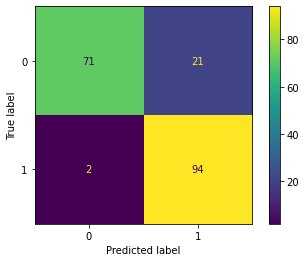

In [11]:
# Plot Confusion matrix

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(mlp1, X_test, y_test)

In [10]:
# Running the Classification report
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
y_pred = mlp1.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86        92
           1       0.82      0.98      0.89        96

    accuracy                           0.88       188
   macro avg       0.89      0.88      0.88       188
weighted avg       0.89      0.88      0.88       188



 The win type 0 refers to By Runs and 1 refers to by Wickets. The Neutral Network training stopped after 200 iterations, at a loss of 0.30495539 after running in all the default iterations set by the MLPClassifier. The accuracy score for the neural network is 87.77 %. The confusion matrix shows 71 correctly predicted vaues for 0 and only 21 incorrectly predicted. It also shows 94 values correctly predicted for 1 and 2 incorrectly predicted for it. The classification report report shows a 97 % correctly predicted variables for 0 and 82 % correctly predicted variables for 1.

2. Neural Network Tuning

In [39]:
# Building
mlp2 = MLPClassifier(hidden_layer_sizes=(200,150,100,50), max_iter=250, activation = 'relu', solver='adam', verbose=1)
# Training
mlp2.fit(X_train, y_train)

Iteration 1, loss = 0.68854218
Iteration 2, loss = 0.65812964
Iteration 3, loss = 0.62911876
Iteration 4, loss = 0.59866363
Iteration 5, loss = 0.56640896
Iteration 6, loss = 0.53577203
Iteration 7, loss = 0.50329806
Iteration 8, loss = 0.47179984
Iteration 9, loss = 0.44122080
Iteration 10, loss = 0.41198087
Iteration 11, loss = 0.38273570
Iteration 12, loss = 0.35976251
Iteration 13, loss = 0.33787362
Iteration 14, loss = 0.31876527
Iteration 15, loss = 0.30555205
Iteration 16, loss = 0.29282758
Iteration 17, loss = 0.27991221
Iteration 18, loss = 0.26943339
Iteration 19, loss = 0.26175569
Iteration 20, loss = 0.25372122
Iteration 21, loss = 0.24554350
Iteration 22, loss = 0.24612406
Iteration 23, loss = 0.23187961
Iteration 24, loss = 0.23022454
Iteration 25, loss = 0.22281150
Iteration 26, loss = 0.21756579
Iteration 27, loss = 0.21296387
Iteration 28, loss = 0.20768892
Iteration 29, loss = 0.20248090
Iteration 30, loss = 0.19821392
Iteration 31, loss = 0.19195251
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(200, 150, 100, 50), max_iter=250, verbose=1)

In [41]:
# Accuracy score

print (mlp2.score(X_test,y_test))

0.824468085106383


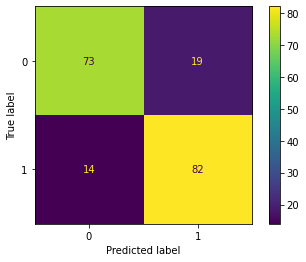

In [42]:
# Plot Confusion matrix

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(mlp2, X_test, y_test)

In [43]:
# Running the Classification report
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
y_pred1 = mlp2.predict(X_test)
print(metrics.classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        92
           1       0.81      0.85      0.83        96

    accuracy                           0.82       188
   macro avg       0.83      0.82      0.82       188
weighted avg       0.83      0.82      0.82       188



I started by adjusting the hidden layer sizes on the hidden layers first. I set the number of layers to four and the nodes to 200, 150, 100, and 50 for each layer in the Neural Network Classifier. In addition, I increased the number of iterations from the default of 200 to 250. Iteration means the number of epochs used because I used by the Adam solver. The algorithm will also utilize verbose to report the overall number of iterations used.

3. Then look at your runs with Multiple and Logistic Regression.

In [55]:
# Improving Logistic Regression with  Gradient Descent
Match = Match[Match['Won_By'].notna()]
Match['Win_Type'] = pd.factorize(Match['Win_Type'])[0]
Match['Match_Date'] = pd.factorize(Match['Match_Date'])[0]
Match['Venue_Name'] = pd.factorize(Match['Venue_Name'])[0]
Match['Toss_Decision'] = pd.factorize(Match['Toss_Decision'])[0]
Match['City_Name'] = pd.factorize(Match['City_Name'])[0]
Match['Host_Country'] = pd.factorize(Match['Host_Country'])[0]

# The Dependant variable is already in a binary shape
# Logistic regression Model.

# Training and Test set
dfTrain = Match[:450]
dfTest = Match[450:500]
dfCheck = Match[520:]

# Conversion to NumPy arrays
train_y = np.asarray(dfTrain['Win_Type']) # We store target in train_y, but as numpy array
train_x = np.asarray(dfTrain.drop('Win_Type',1)) # We remove target from the predictors (because it's the output variable)
test_y = np.asarray(dfTest['Win_Type']) # See the comments above
test_x = np.asarray(dfTest.drop('Win_Type',1))

# input normalization.
np.seterr(divide='ignore', invalid='ignore')
means = np.mean(train_x, axis=0)
std = np.std(train_x, axis=0)
 
train_x = (train_x - means)/std
test_x = (test_x - means)/std

In [57]:
# Logistic Regression with stochastic gradient using sklearn.linear_model.SGDClassifier

from sklearn.linear_model import SGDClassifier

model = SGDClassifier(loss="log", penalty=None)
train_x = np.nan_to_num(train_x)
model.fit(train_x, train_y)

# Testing the Model
test_x = np.nan_to_num(test_x)
accuracy = model.score(test_x, test_y)
print("accuracy = ", accuracy * 100, "%")

accuracy =  80.0 %


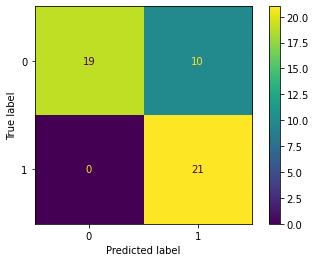

In [58]:
# Plot Confusion matrix

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, test_x, test_y)

In [59]:
# Running the Classification report
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
y_pred2 = model.predict(test_x)
print(metrics.classification_report(test_y, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.66      0.79        29
           1       0.68      1.00      0.81        21

    accuracy                           0.80        50
   macro avg       0.84      0.83      0.80        50
weighted avg       0.86      0.80      0.80        50



The regression formula was modified first through gradient descent, which increased the accuracy score from 78.0 percent to 80.0 percent. It has enhanced the accurately predicted variables of 0 from 18 to 19 in the confusion matrix. The Classification report shows that all of the predicted values for 0 were right 100 percent of the time. It also shows that 68 percent of the results for 1 were properly anticipated. The win type by runs is denoted by 0, and the win type by wickets is denoted by 1.